# Demiana Shaker
# Jyothsna Madamanchi
# Insurance Premium Analysis (Group Final Project)
# www.kaggle.com/

# Predicting Insurance Premiums
The purpose of the Exploratory Data Analysis, Data Visualization and Machine Learning to use this information to predict charges for the new customers. Our simple dataset contains a few attributes for each person such as Age, Sex, BMI, Children, Smoker, Region and their charges.



### Importing necessary Libraries for EDA and Machine Learning 

In [ ]:
import pandas as pds  # Import pandas
import numpy as np   # Import numpy
import seaborn as sns # Import seaborn
import plotly.express as px  # Import plotly express for Interactive Chart 
import matplotlib.pyplot as plt  # Import matplotlib 
from sklearn.metrics import r2_score # r2score 
from sklearn.linear_model import LinearRegression # linear regression model 
from matplotlib.animation import FuncAnimation #Import Animation Function
from sklearn.model_selection import train_test_split # train test split
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model
from sklearn.ensemble import RandomForestRegressor # random forest model 
from math import sqrt  # For squareroot operation
from sklearn.cluster import KMeans # kmeans clustering 
from plotly.offline import iplot, init_notebook_mode # Standard plotly imports
init_notebook_mode()
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

%matplotlib inline

# Exploratory Data Analysis

### Previewing Insurance dataset 

In [ ]:
myData = pd.read_csv('insurance.csv')  # read the dataset

In [ ]:
myData.head()  # Used .head() to get the first five raws of the dataset

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
myData.dtypes  # Identification of data types

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are 7 columns and 1338 raws in the dataset . 

In [ ]:
myData.shape  #Used .shape to find the size of the dataset

(1338, 7)

# Statistical Summary of Numeric Variables
Used '.describe()'method below to get statistical summary of numeric variables :
The minimum age has insurance is 18 and maxiumum age is 64 . The minimum bmi is 15 (severely underweight) and the maximum bmi is 53 (extremely obese).The maximum children are five children for people who has life insurance and the minimum is zero . The minimum life insurance charges is 1121.87 and the  maxiumum charges is 63770.42. 

In [ ]:
myData.describe()  # Description of variables

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [ ]:
myData.info()  # get info - there are 7 columns and 1337 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Finding null values :
Used .isnull () method below to check if there are none missing value in the dataset. There is no null value below . 

In [ ]:
myData.isnull().sum()  # none missing value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Visualization

## Customers who have Children by Charges :

* The first figure below shows that most customers does not have children and very few customers have 4 or 5 children.
* The second figure below shows that 42.9 % of customers does not have children, 24.2% of customers have one child, 17.9 % have two children, 11.7 % have three children ,1.9 % have four children and 1.3 % have five children. 
* The third figure below shows that customers who have more children they will have less charges . 

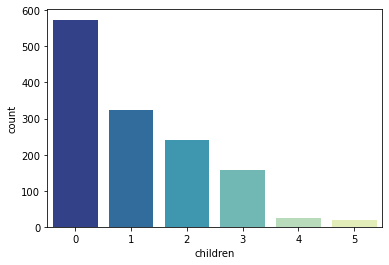

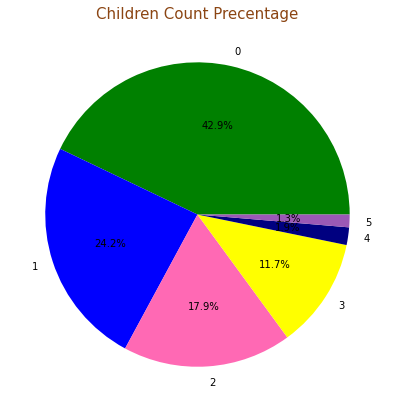

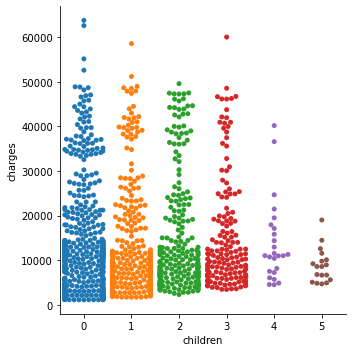

In [ ]:
# Simple Histogram
sns.countplot(x="children", data=myData, palette='YlGnBu_r')
# children vs non children
plt.show()  # plot the histogram

# Pie Chart
labels = myData.children.value_counts().index  # children count percentage
colors = ["green", "blue", "hotpink", "yellow", "navy",
          "#9b59b6"]  # color of pie chart
sizes = myData.children.value_counts().values
plt.figure(figsize=(7, 7))  #plot the figure
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Children Count Precentage", color="saddlebrown",
          fontsize=15)  #title of pie chart

# Swarm Plot # analyzing the children with Insurance Charges
sns.catplot(x="children", y="charges", kind="swarm", data=myData)

# How does Regions affect Life Insurance Charges ?
The first graph shows that the most customers from Southeast and the least number of customer from Northeast.
The second figure shows that 24.3 % customers from southwest, 27.2% customers from southeast, 24.3% customers from northwest and 24.2% customers from northeast. 
The third figure show that customers from southeast charges more than other regions and customers charges from southwest charges less than other regions. 


Text(0.5, 1.0, ' barplot Region by Charges')

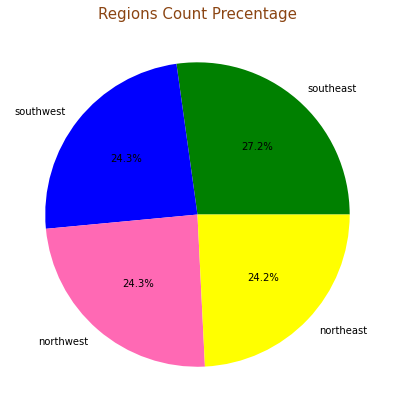

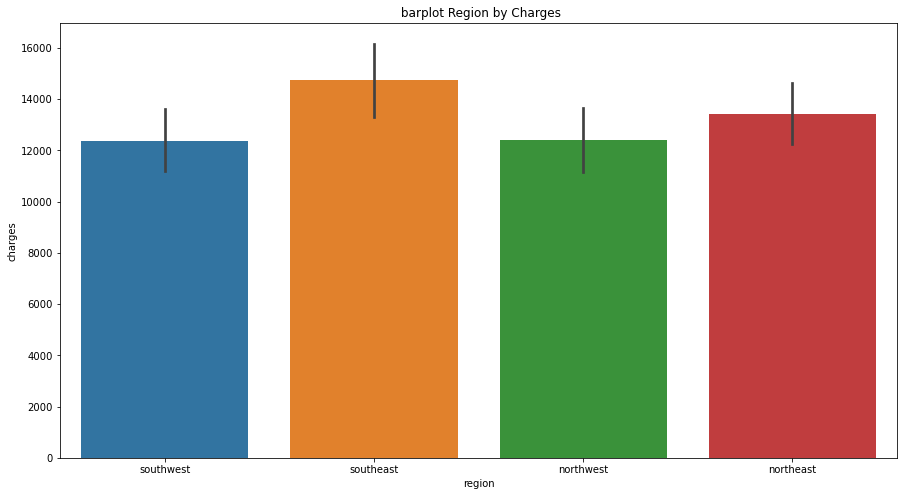

In [ ]:
# simple interactive Histogram
fig = px.histogram(
    myData, x="region")  # compare region who has most / least Life Insurance
fig.show()  # plot the interactive histogram for regions

# Pie Chart
labels = myData.region.value_counts(
).index  # Compare the regions by percentage
colors = ["green", "blue", "hotpink", "yellow", "navy",
          "#9b59b6"]  # color of pie chart
sizes = myData.region.value_counts().values
plt.figure(figsize=(7, 7))  #plot the figure
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Regions Count Precentage", color="saddlebrown",
          fontsize=15)  #title of pie chart

plt.figure(figsize=(15, 8))  #figure size
ax = sns.barplot(x='region', y='charges',
                 data=myData)  # simple barplot to compare regions by charges
ax.set_title(' barplot Region by Charges')  #title for barplot

## How does smoking affect Life Insurance Charges ?

* The first figure below shows that Non-smokers’ customers are more compared to smokers’ customers. 
* The second figure below shows that Insurance charges were high for smokers than non-smokers.
* The third figure below shows that 79.5 % of customers are non-smokers and 20.5% of customers are smokers.
* The fourth figure below shows that customers with five children and smokers charges less than other customers. Also it shows that smokers customers who doesn’t have children charges more than other customers. 



no     1064
yes     274
Name: smoker, dtype: int64


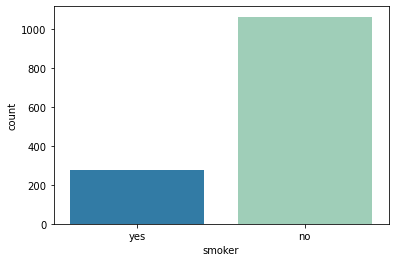

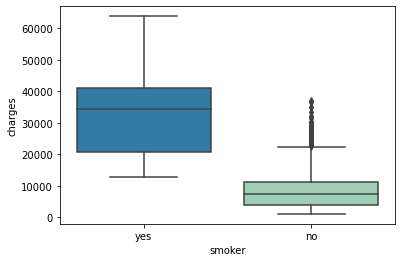

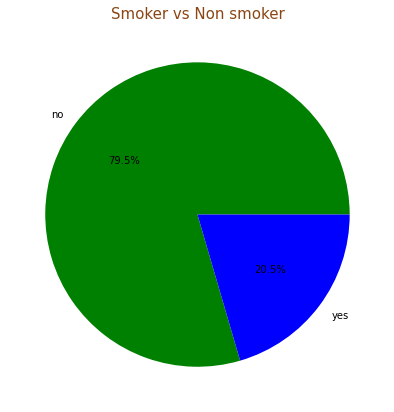

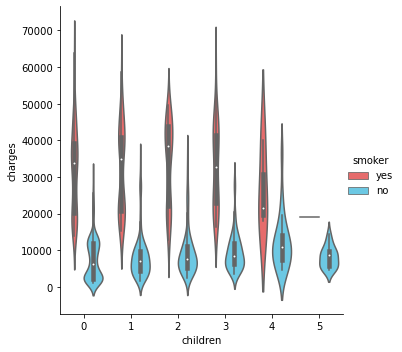

In [ ]:
vc = myData["smoker"].value_counts()  # count smoker
print(vc)

# Simple Histogram for Smoker and Non smoker
sns.countplot(x="smoker", data=myData, palette='YlGnBu_r')
# smoker vs non smoker
plt.show()

# boxplot smoker and non smoker charges
sns.boxplot(x="smoker", y="charges", data=myData, palette='YlGnBu_r')
# smokers insurance costs higher than non smokers
plt.show()  # plot the histogram

# Pie Chart Smoker vs None Smoker precentage
labels = myData.smoker.value_counts().index  #labels of the pie chart
sizes = myData.smoker.value_counts().values  # sizes of the pie chart
plt.figure(figsize=(7, 7))  # size of Pie Chart
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Smoker vs Non smoker", color="saddlebrown",
          fontsize=15)  # title for pie chart

#Catplot combined people who smoke and don't smoke and people who has children and doesn't has children
pal = ["#FA5858", "#58D3F7"]  # palette for catplot
sns.catplot(x="children",
            y="charges",
            hue="smoker",
            kind="violin",
            data=myData,
            palette=pal)

### How age affects life insurance charges ?

* The first figure below shows that ages between 18 and 19 are the highest number of people who having Life Insurance and age between 64 - 65 are the lowest number of people who having life insurance. 
* The second figure below shows that the younger customers charges less than older customers . 

Text(0.5, 1.0, 'Age by Charges')

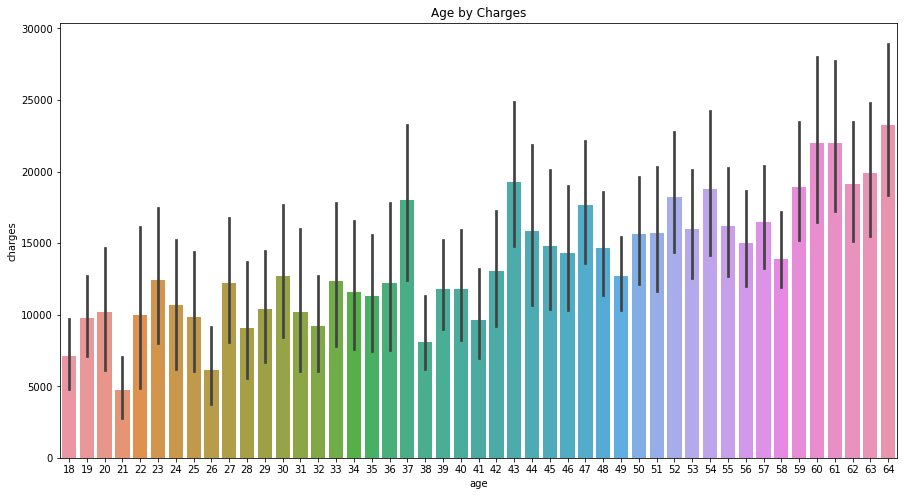

In [ ]:
fig = px.histogram(myData,
                   x='age')  # Plotting the age in the dataset using histogram
fig.show()  # plot the attractive histogram

plt.figure(figsize=(15, 8))  #figure size
ax = sns.barplot(x='age', y='charges',
                 data=myData)  # simple barplot to compare regions by charges
ax.set_title('Age by Charges')  #title

### How does gender affect life insurance charges ?

* The first figure below shows that males who smoke are greater than females.
* The second figure below shows that there are 50.5% of customers are male and 49.5% of customers are female.


Text(0.5, 1.0, 'Male vs Female ')

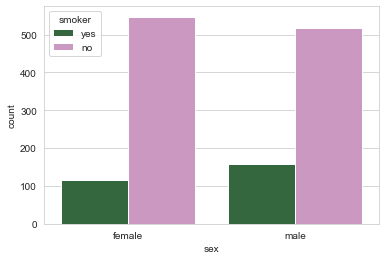

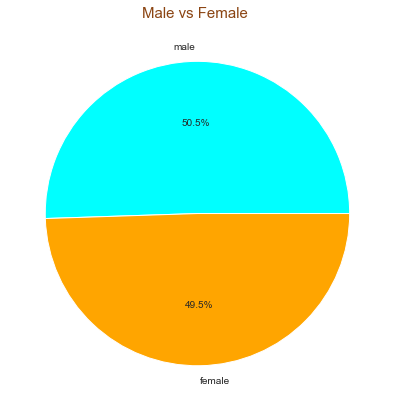

In [ ]:
sns.set_style('whitegrid')  # using sns.countplot between sex and smoker
sns.countplot(x='sex', hue='smoker', data=myData, palette='cubehelix')

labels = myData.sex.value_counts().index  # labels for the pie chart
sizes = myData.sex.value_counts().values  # size for the pie chart
colors = ["cyan", "orange", "hotpink", "green", "navy",
          "#9b59b6"]  # colors for pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")  # plot the pie
plt.title("Male vs Female ", color="saddlebrown",
          fontsize=15)  # plot the title


* The Interactive bar plot below shows that males charges more than female . 

In [ ]:
myData.iplot(kind='bar', x=['sex'], y='charges')  # Interactive Bar Plot

### BMI vs Charges


* The first figure below shows that there is a peak at BMI of 30. More number of people are in the range of BMI between 25-35.
* The second figure below shows that Insurance charges are high for customers whose BMI is high.

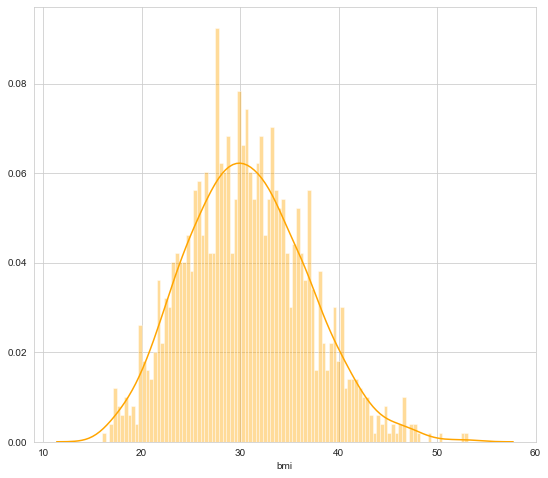

In [ ]:
plt.figure(figsize=(9, 8))  # histograms to plot BMI
sns.distplot(myData['bmi'], color='orange', bins=100, hist_kws={'alpha': 0.4})

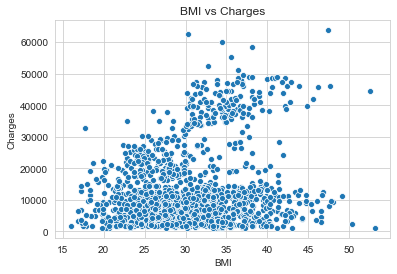

In [ ]:
ax = sns.scatterplot(data=myData, x='bmi',
                     y='charges')  # scatter plot BMI vs Charges
ax.set_title("BMI vs Charges")  # plot the title
plt.xlabel("BMI")  # plot xlabel
plt.ylabel("Charges")  # plot y label
plt.show(ax)  # plot the graph

### Frequency of the data variables 

By the below histograms we get the max percentage of people in each variable range. We can see that that frequency of people are more in age group ranging from 18-20. Majority of people have body mass index between 30-35. And majority of people have no children who have subscribed for Insurance policy and the max Insurance charges charged were in the range is from 1000-15000 .

c:\users\demis\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

c:\users\demis\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

c:\users\demis\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

c:\users\demis\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: M

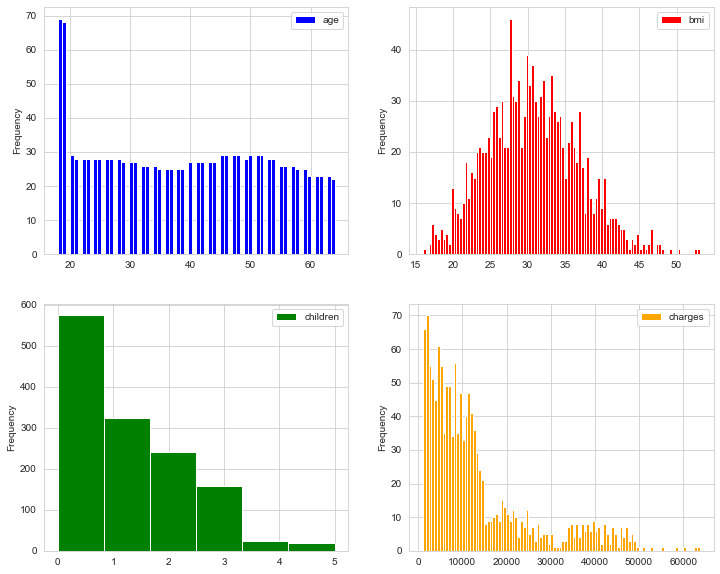

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
myData.plot(kind="hist", y="age", bins=70, color="b",
            ax=axes[0][0])  # plot the frequency of age
myData.plot(kind="hist", y="bmi", bins=100, color="r",
            ax=axes[0][1])  # plot the frequency of BMI
myData.plot(kind="hist", y="children", bins=6, color="g",
            ax=axes[1][0])  # plot the frequency of Children
myData.plot(kind="hist", y="charges", bins=100, color="orange",
            ax=axes[1][1])  # plot the frequency of Charges
plt.show()  # plot the graphs

 ### Correlation
 
 There is one strongly correlated age with Charges.

In [ ]:
num_corr = myData.corr()['charges']  # get the correlation
features_list = num_corr[abs(num_corr) > 0.2].sort_values(ascending=False)
print("There is {} strongly correlated values with Charges:\n{}".format(
    len(features_list), features_list))

There is 2 strongly correlated values with Charges:
charges    1.000000
age        0.299008
Name: charges, dtype: float64


#### The relationship between smoker and other variables 
The pair plot matrix shows relationship between diffferent variables

Text(0.5, 1.0, 'smokers')

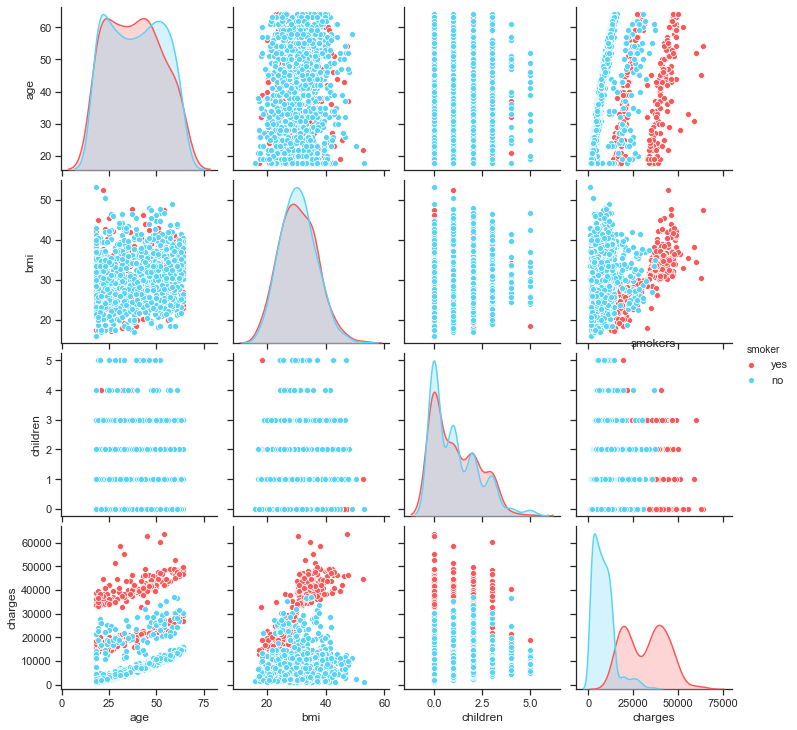

In [ ]:
sns.set(style="ticks")  # style of the Pair plot
pal = ["#FA5858", "#58D3F7"]  # palette
sns.pairplot(myData, hue="smoker", palette=pal)  # plot the pair plot
plt.title("smokers")  # plot the title

### Age vs Charges by Smoker
The below scatterplot shows the relationship of Age vs Expenses by smoker.There is a correlation between smokers and charges, age and charges. As the age hikes up and smoking ratio increases the insurance premium charges hiked up.

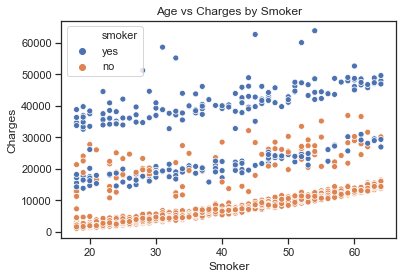

In [ ]:
ax = sns.scatterplot(data=myData, x='age', y='charges',
                     hue='smoker')  # scatter plot age vs charges by smoker
ax.set_title("Age vs Charges by Smoker")  # title
plt.xlabel("Smoker")  # plot xlabel
plt.ylabel("Charges")  # plot ylabel
plt.show(ax)  # plot the graph

### Children vs Charges by Smoker

Below scatterplot shows that customers who smoke and do not have children charged more than other. Although customers who have smoke and have five children did not charge like other smokers.

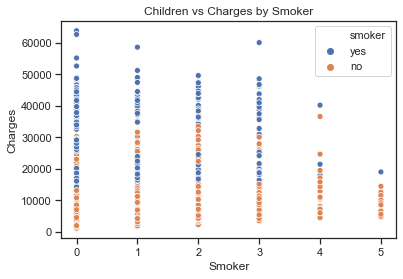

In [ ]:
ax = sns.scatterplot(
    data=myData, x='children', y='charges',
    hue='smoker')  # plot scatter plot children vs charges by smoker
ax.set_title("Children vs Charges by Smoker")  # plot the title
plt.xlabel("Smoker")  # plot x label
plt.ylabel("Charges")  # plot y label
plt.show(ax)  # plot the graph

### BMI vs Charges by Smoker

The scatterplot below shows that non smokers with high BMI charges less that customers who are smokers with high BMI. 

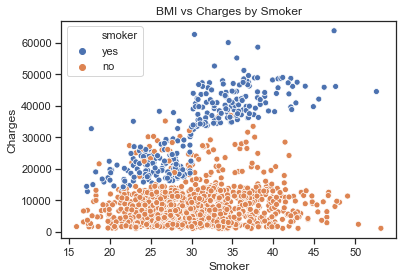

In [ ]:
ax = sns.scatterplot(data=myData, x='bmi', y='charges',
                     hue='smoker')  # lot scatter plot bmi vs charges by smoker
ax.set_title("BMI vs Charges by Smoker")  # plot the title
plt.xlabel("Smoker")  # plot x label
plt.ylabel("Charges")  # plot y label
plt.show(ax)  # plot the graph

### Checking correlation between all variables with Charges 
The below pair plots shows the correlation between different variables and their charges.we can see that there is clear corrrelation between the different criteria versus charges.Age,sex,bmi,children ,smoker are independant variable and charges are dependent variable

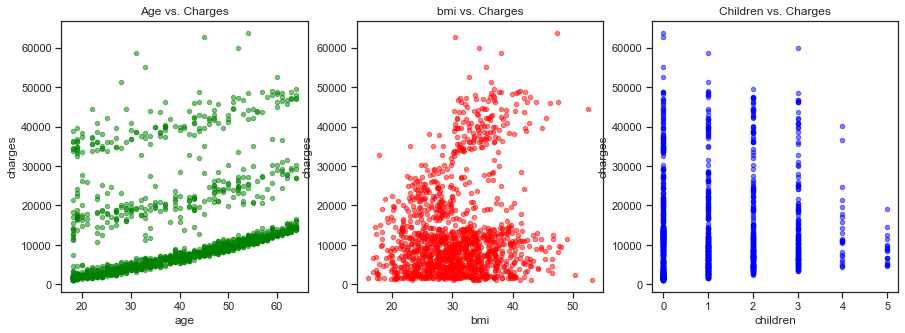

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Scatter Plot
myData.plot(kind='scatter',
            x='age',
            y='charges',
            alpha=0.5,
            color='green',
            ax=axes[0],
            title="Age vs. Charges")  # scatter plot age ve charges
myData.plot(kind='scatter',
            x='bmi',
            y='charges',
            alpha=0.5,
            color='red',
            ax=axes[1],
            title="bmi vs. Charges")  # scatter plot bmi vs children
myData.plot(kind='scatter',
            x='children',
            y='charges',
            alpha=0.5,
            color='blue',
            ax=axes[2],
            title="Children vs. Charges")  # scatter plot children vs charges
plt.show()  # plot the graph

# Machine Learning Models :

## Preparing Data for Machine Learning Algorithms

In [ ]:
df = myData  # let df = my data frame

Use Onehot encoding method to convert my catogrical variables into numerical variables for Machine learning 

In [ ]:
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot,
                           columns=['sex', 'smoker', 'region'],
                           prefix=['sex', 'smoker', 'region'])
print(df_onehot.head())  # print the head


   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400           1         0          0   
1   18  33.770         1   1725.55230           0         1          1   
2   28  33.000         3   4449.46200           0         1          1   
3   33  22.705         0  21984.47061           0         1          1   
4   32  28.880         0   3866.85520           0         1          1   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0           1                 0                 0                 0   
1           0                 0                 0                 1   
2           0                 0                 0                 1   
3           0                 0                 1                 0   
4           0                 0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 

In [ ]:
X = df_onehot.drop(['charges'], axis=1)  # define X and y for ML
y = df_onehot.charges

### Splitting the dataset 

Splitted the data set training size will be 80 % of the data and testing will be 20 % of the data set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)  # split the dataset

### Multiple Linear Regression Model
 Training the Multiple Linear Regression model on the Training set

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)  # train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 Predicting The Test set results 

In [ ]:
y_pred = regressor.predict(X_test)  # predict the test set results
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1))))  # print y pred
print(y_test)  # print y test

[1.12e+04 9.49e+03 3.82e+04 1.63e+04 6.91e+03 3.96e+03 1.58e+03 1.44e+04
 9.01e+03 7.51e+03 4.49e+03 1.03e+04 8.80e+03 3.80e+03 2.79e+04 1.07e+04
 1.13e+04 6.11e+03 8.24e+03 2.71e+04 3.36e+04 1.44e+04 1.17e+04 3.21e+04
 4.17e+03 9.25e+03 1.08e+03 9.80e+03 3.77e+03 1.04e+04 9.01e+03 4.01e+04
 1.57e+04 1.39e+04 2.48e+04 5.17e+03 1.26e+04 3.08e+04 3.35e+04 3.67e+03
 3.98e+03 3.99e+03 3.05e+04 3.95e+04 2.78e+04 5.09e+03 1.06e+04 7.83e+03
 3.59e+03 1.02e+04 5.72e+03 3.43e+03 3.30e+04 3.85e+04 1.61e+04 7.16e+03
 5.74e+03 9.45e+03 8.91e+03 1.17e+04 1.86e+03 3.89e+04 1.49e+04 1.18e+04
 1.41e+04 1.41e+04 2.58e+04 3.22e+04 8.14e+02 1.02e+04 1.24e+04 1.15e+04
 2.52e+04 1.56e+04 1.12e+04 1.26e+04 6.56e+03 9.59e+03 3.02e+04 3.91e+04
 1.20e+04 3.73e+04 4.27e+03 9.39e+03 3.49e+04 2.88e+04 8.69e+03 4.93e+03
 1.20e+04 3.05e+04 1.01e+04 1.14e+04 8.40e+03 8.90e+03 8.43e+03 7.32e+03
 3.60e+04 3.32e+04 7.66e+03 1.51e+04 4.02e+03 8.83e+03 6.32e+03 3.15e+04
 3.30e+04 1.97e+03 9.03e+03 6.70e+03 1.46e+04 3.72e

### Evaluating Multiple Linear Regression Model

In [ ]:
r2_score(y_test, y_pred)  # r2 score for linear regression model

0.7999876970680433

In [ ]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})  # actual vs predicated
results  # print the results

Actual     Predicted
578    9724.53000  11169.927119
610    8547.69130   9486.709085
569   45702.02235  38181.123053
1034  12950.07120  16266.313289
198    9644.25250   6914.648007
...           ...           ...
1084  15019.76005  14760.230968
726    6664.68595   8277.984346
1132  20709.02034  16149.973370
725   40932.42950  32904.758143
963    9500.57305   9467.614058

[268 rows x 2 columns]

### Random Forest Regression Model

In [ ]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)  # train the model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test)  # test the model
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1))))  # print y pred
print(y_test)  # print y test

[ 9884.67  8611.76 44845.53 13218.47 11039.76 11629.91  2080.38 10346.87
  7189.08  7975.12  6587.04 17452.43  9721.22  6932.86 23600.31 12264.5
 14375.78  8377.06  6560.01 33876.8  23724.57 12666.55 15319.55 29002.88
  1522.08  9596.37 13103.35  7230.68  3758.19  8661.62  7430.77 48735.93
 14948.7  10353.89 15709.82  3930.46  8312.21 37583.94 40278.97  3997.28
 11118.72  2850.94 20844.78 47810.19 37295.38  7603.57 12264.5   6829.61
  6328.98 11942.74  2667.88 13380.88 26381.62 46154.52 11732.33  5960.29
  6845.35 13625.33  8811.96 21828.77  1302.39 45605.27 19209.33  9991.05
 13207.68  9694.47 33826.28 45596.67  9134.01  9268.64 15999.64 11568.63
 17711.71 13667.02 12920.36 17520.63  9341.49 13771.64 19766.43 47867.87
 11560.03 46349.7   1929.71 10359.63 40140.36 19403.47  3295.44  4111.65
 23436.07 38308.29 17631.93 14410.04  2743.47 16407.33 10251.28 10112.02
 43446.81 48186.77  6673.57 10736.99  4874.27  7631.97  9173.38 38217.32
 28390.97  3655.72 11046.85  6414.13 11458.48 46327.

### Evaluating Random Forest Regression model

In [ ]:
r2_score(y_test, y_pred)  # r2 score for forest regression model

0.8644251643022118

In [ ]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})  # actual vs predicated result
results  # show the result

Actual     Predicted
578    9724.53000   9884.669925
610    8547.69130   8611.755135
569   45702.02235  44845.525420
1034  12950.07120  13218.471470
198    9644.25250  11039.755671
...           ...           ...
1084  15019.76005  16339.000038
726    6664.68595   6755.808440
1132  20709.02034  11399.089675
725   40932.42950  43881.415706
963    9500.57305   8811.152510

[268 rows x 2 columns]

### Decision Tree Regression Model

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)  # train the model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_pred = regressor.predict(X_test)  # test the model
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1))))
print(y_test)

[10797.34  8569.86 42983.46 13429.04  9264.8  21984.47  2196.47 10848.13
  7151.09  4433.92  7228.22  8932.08 32108.66  4415.16 35147.53 10381.48
 12323.94 24671.66  6455.86 33900.65 24667.42 12269.69 10197.77 24915.22
  1391.53 18903.49  2680.95  7151.09  3757.84  8116.27  7151.09 47896.79
 13462.52 10226.28 14283.46  3736.46  8978.19 38511.63 39983.43  2207.7
 21984.47  3645.09 21659.93 49577.66 36307.8   3579.83 10381.48  6389.38
  5209.58 11833.78  3046.06 22493.66 25309.49 46661.44 11856.41  2689.5
  2497.04  8932.08 18806.15 14119.62  1252.41 46130.53 14007.22  8116.68
 26392.26  9872.7  33900.65 55135.4  11884.05 15828.82 13451.12  9487.64
 17560.38 13887.2  12629.9  12815.44  7526.71  7147.47 20773.63 48824.45
 11658.12 63770.43  2741.95  6849.03 42211.14 20984.09  2927.06  2897.32
 12913.99 36950.26 18903.49  9850.43  3213.62  8516.83 12404.88 18903.49
 41999.52 62592.87  4922.92 10601.41  1815.88  5373.36  5138.26 37079.37
 37829.72  3176.29 11345.52  2689.5  11362.75 46130.5

### Evaluating Decision Tree Regression Model

In [ ]:
r2_score(y_test, y_pred)  # r2 score for decision tree

0.7261029948550859

In [ ]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})  # actual vs predicated
results  # show the result

Actual    Predicted
578    9724.53000  10797.33620
610    8547.69130   8569.86180
569   45702.02235  42983.45850
1034  12950.07120  13429.03540
198    9644.25250   9264.79700
...           ...          ...
1084  15019.76005  16455.70785
726    6664.68595   6393.60345
1132  20709.02034  10982.50130
725   40932.42950  41949.24410
963    9500.57305   8606.21740

[268 rows x 2 columns]

#  Kmeans Clustering

In [ ]:
x = myData.iloc[:, [2, 6]]  # definde X and y

The elbow method is a technique to choose the most number of clusters.
The graph below shows that there are 3 clusters in the data set.

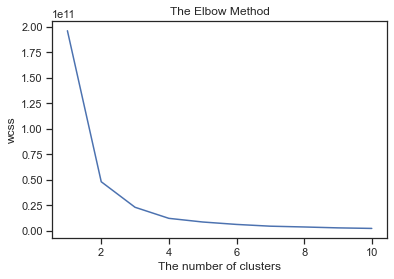

In [ ]:
wcss = []  # intialize empty list
for i in range(1, 11):  # number of clusters need to be adentifie
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    random_state=42)  # first pramter = numb of cluster
    # Init = intializing the k means by kmeans ++
    # random_state to find the exact numbers
    kmeans.fit(x)  # train the kmeans by Latitude Longitude
    wcss.append(
        kmeans.inertia_
    )  # to get wcss we need to append new values which to call object
plt.plot(range(1, 11), wcss)  # plot the number of clusters
plt.title("The Elbow Method")  # plot the title
plt.xlabel("The number of clusters")  # plot the x label
plt.ylabel("wcss")  # plot the y label
plt.show()  # graph elbow method

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)  # train and predict the models
print(y_kmeans)  # it shows every groups on clusters 2

[2 2 2 ... 2 2 0]


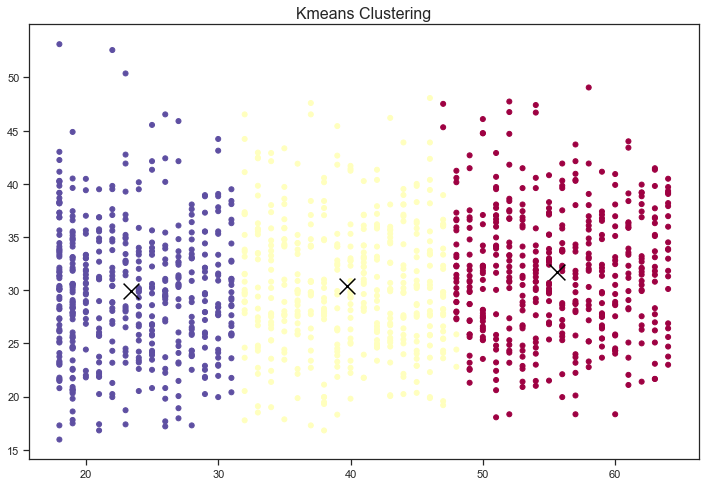

In [ ]:
fig = plt.figure(figsize=(12, 8))  # figure size
plt.scatter(X.values[:, 0],
            X.values[:, 1],
            c=kmeans.labels_,
            cmap="Spectral",
            s=25)  # plot the scatter
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            color='black',
            marker="x",
            s=250)
plt.title("Kmeans Clustering", fontsize=16)  #plot the title
plt.show()  # plot the graph

# Conclusion :

* Insurance charges were high for smokers than non-smokers.

* Insurance charges were high for customers who dont have children and less for who have more number of children.

* Insurance charges trends up as the age increases.

* More customers are from southeast region and less in northeast region.

* Insurance charges are high for customers whose BMI is high.

* Majority of customers have BMI in the range between 30-35.

* More customers are in the age group ranging from 18-20.

* Female non smokers are high when compared to male non smokers.

* Non smokers are more compared to smokers.

* Males are 1% more in number compared to females.

* Majority of customers doesn't have children and very few customers have 4 or 5 children.

* There is a positive correlation with all independant variables and dependent variable.

* There is a negative correlation with the Independent variable children and Insurance charges as the children increases insurance charges decreases.